In [ ]:
#Cell 1 - Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Set plotting style and suppress warnings
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

# Create directories for figures and text if they don't exist
figures_dir = "../reports/figures"
text_dir = "../reports/text"

os.makedirs(figures_dir, exist_ok=True)
os.makedirs(text_dir, exist_ok=True)

In [ ]:
#Cell 2 - Load Data and Save Info

data_path = '../data/raw/train.csv'
df = pd.read_csv(data_path)
print("Train data loaded. Shape:", df.shape)

info_text_path = os.path.join(text_dir, "basic_info.txt")
with open(info_text_path, "w") as f:
    df.info(buf=f)

Train data loaded. Shape: (1460, 81)


In [14]:
#Cell 3 - Basic Data Overview

# Display the first few rows
display(df.head())

# Save .head() output to CSV for reference
head_csv_path = os.path.join(text_dir, "train_head.csv")
df.head().to_csv(head_csv_path, index=False)

# Summary statistics
desc = df.describe()
display(desc)

# Save describe() output
desc_csv_path = os.path.join(text_dir, "describe.csv")
desc.to_csv(desc_csv_path)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
#Cell 4 - Check for Missing Values

missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

display(missing_df[missing_df['Missing Values'] > 0])

# Save missing values to CSV
missing_csv_path = os.path.join(text_dir, "missing_values.csv")
missing_df[missing_df['Missing Values'] > 0].to_csv(missing_csv_path)


,Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


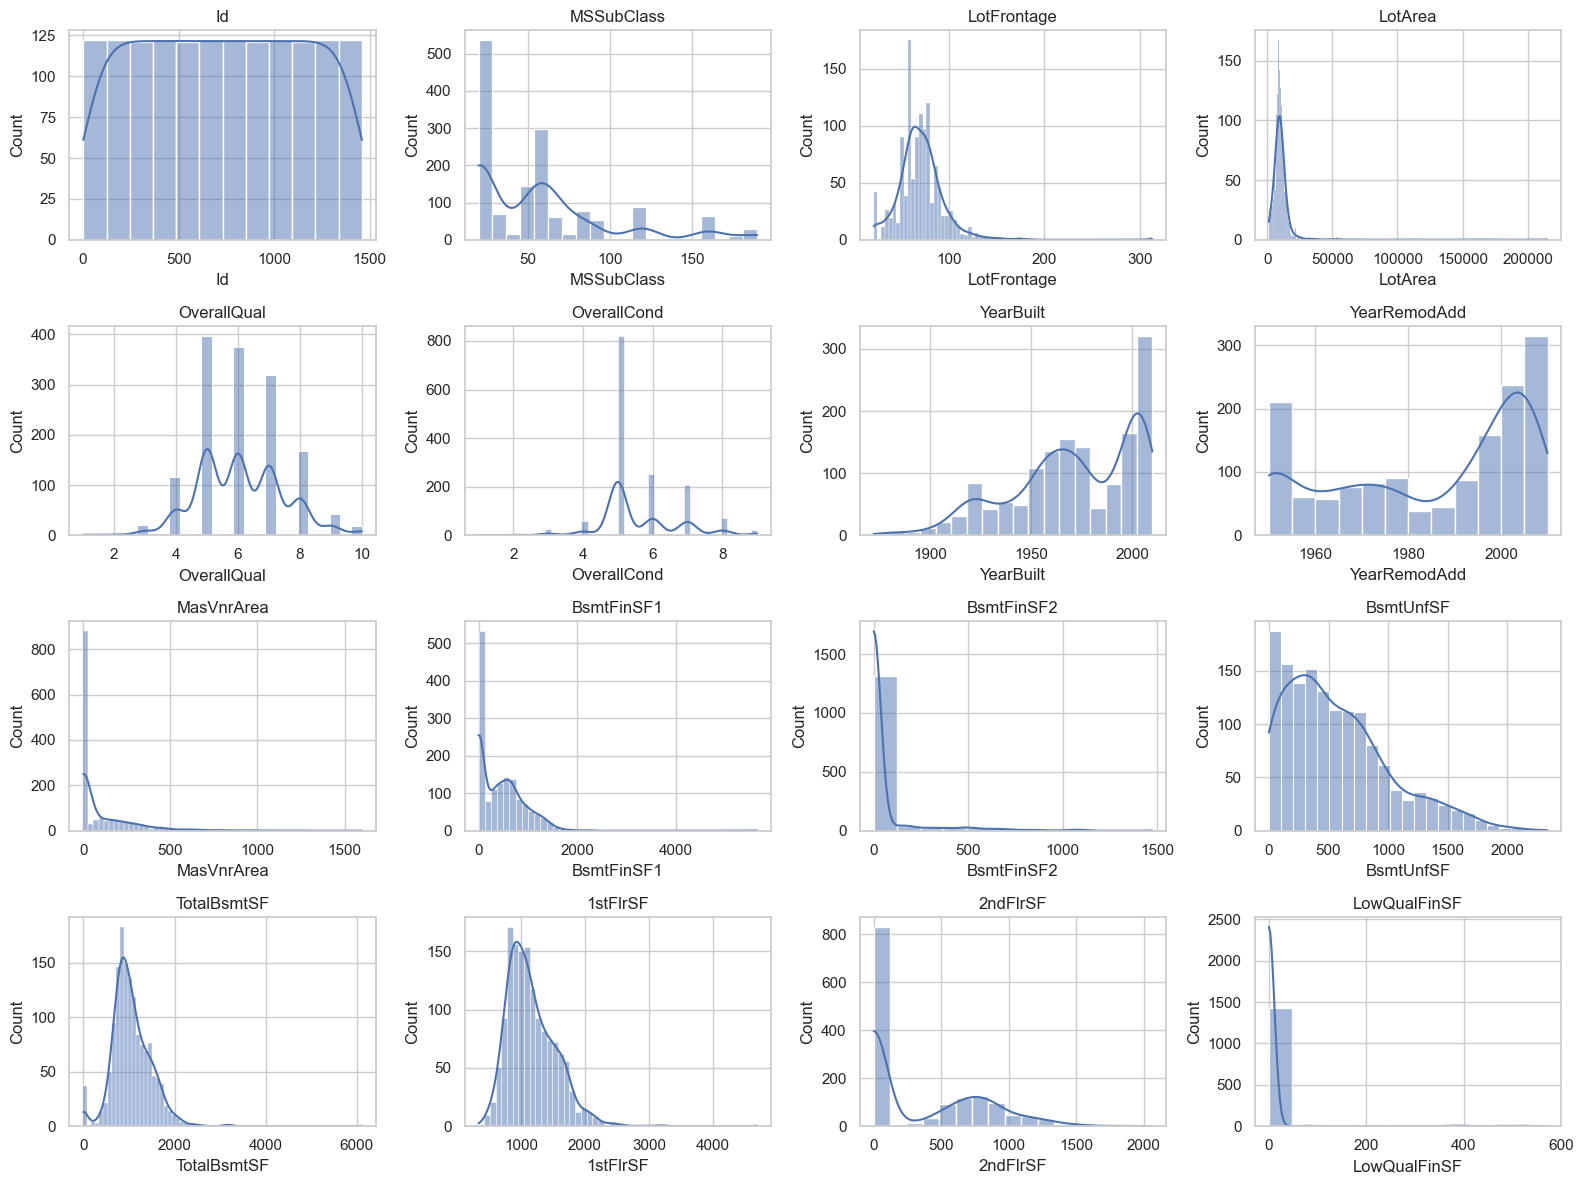

In [16]:
#Cell 5 - Univariate Analysis for Numeric Features

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols[:16]):  # Adjust number of plots if necessary
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

plt.tight_layout()

# Save the figure
hist_figure_path = os.path.join(figures_dir, "univariate_histograms.png")
plt.savefig(hist_figure_path, dpi=300, bbox_inches='tight')
plt.show()


In [17]:
#Cell 6 - Categorical Feature Overview

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Create a text file to store top 10 value counts for each categorical feature
cat_counts_path = os.path.join(text_dir, "categorical_value_counts.txt")
with open(cat_counts_path, "w") as f:
    for col in categorical_cols:
        top_counts = df[col].value_counts().head(10)
        f.write(f"Column: {col}\n{top_counts}\n\n")
        
        # Also display in notebook
        print(f"\nColumn: {col}")
        display(top_counts)



Column: MSZoning


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Column: Street


Pave    1454
Grvl       6
Name: Street, dtype: int64


Column: Alley


Grvl    50
Pave    41
Name: Alley, dtype: int64


Column: LotShape


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


Column: LandContour


Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


Column: Utilities


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


Column: LotConfig


Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


Column: LandSlope


Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


Column: Neighborhood


NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
Name: Neighborhood, dtype: int64


Column: Condition1


Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


Column: Condition2


Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64


Column: BldgType


1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


Column: HouseStyle


1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


Column: RoofStyle


Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64


Column: RoofMatl


CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64


Column: Exterior1st


VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Name: Exterior1st, dtype: int64


Column: Exterior2nd


VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
Name: Exterior2nd, dtype: int64


Column: MasVnrType


None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


Column: ExterQual


TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64


Column: ExterCond


TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64


Column: Foundation


PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


Column: BsmtQual


TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


Column: BsmtCond


TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


Column: BsmtExposure


No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


Column: BsmtFinType1


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


Column: BsmtFinType2


Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


Column: Heating


GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


Column: HeatingQC


Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64


Column: CentralAir


Y    1365
N      95
Name: CentralAir, dtype: int64


Column: Electrical


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


Column: KitchenQual


TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64


Column: Functional


Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


Column: FireplaceQu


Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


Column: GarageType


Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


Column: GarageFinish


Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


Column: GarageQual


TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64


Column: GarageCond


TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


Column: PavedDrive


Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


Column: PoolQC


Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64


Column: Fence


MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64


Column: MiscFeature


Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64


Column: SaleType


WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


Column: SaleCondition


Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

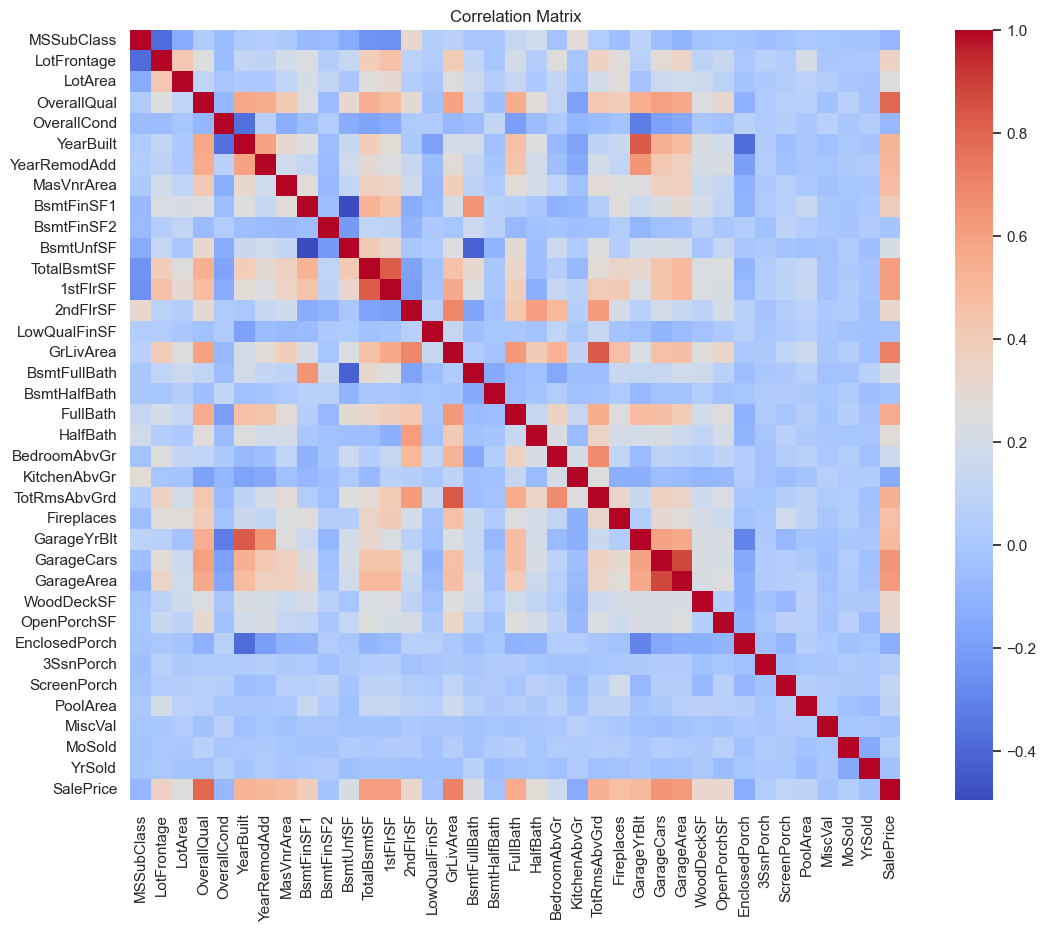

In [18]:
#Cell 7 - Correlation Analysis

# Drop 'Id' if present
df_numerics = df.select_dtypes(include=['int64', 'float64']).drop(columns='Id', errors='ignore')

plt.figure(figsize=(14, 10))
corr_matrix = df_numerics.corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", square=True)
plt.title("Correlation Matrix")

# Save correlation matrix to CSV
corr_matrix_path = os.path.join(text_dir, "correlation_matrix_full.csv")
corr_matrix.to_csv(corr_matrix_path)

# Save the figure
corr_fig_path = os.path.join(figures_dir, "correlation_matrix_full.png")
plt.savefig(corr_fig_path, dpi=300, bbox_inches='tight')
plt.show()
